<h1 style="text-align: center;"><b><u>ANALYSIS OF AIR QUALITY INDEX OF INDIAN CITIES</u></b></h1>

Here are the top 11 intricate insights you can extract from this dataset:

### **1. Most Polluted City & Least Polluted City**
   - Determine which city has the highest and lowest average pollutant concentration across all recorded pollutants.

### **2. Most Common Pollutant**
   - Identify the most frequently recorded pollutant across all rows.

### **3. Maximum and Minimum Pollution Levels per Pollutant**
   - Find the highest and lowest values of **Pollutant_Max** and **Pollutant_Min** for each pollutant.

### **4. Pollution Variability per Location**
   - Calculate the standard deviation of pollutant values per station to understand pollution consistency..

### **5. City-wise Pollutant Contributions**
   - Identify which city contributes the most to each pollutant type.

### **6. Location with the Highest Pollution Spikes**
   - Find the location with the highest recorded **Pollutant_Max** values.

### **7. Stations with Frequent High Readings**
   - Determine which monitoring stations frequently report above-threshold pollution levels.

### **8. Correlation Between Pollutants**
   - Find correlations between different pollutants (e.g., does **NO2** increase when **SO2** increases?).

### **9. Pollution Hotspots**
   - Use latitude and longitude data to map out geographical pollution hotspots.

### **10. Areas with the Cleanest Air**
   - Find areas with the lowest **Pollutant_Avg** values across all pollutants.

### **11. Extreme Pollution Events**
   - Identify extreme pollution events where the **Pollutant_Max** exceeds a critical threshold.

## DATA CLEANING AND PREPROCESSING

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display


# Load the dataset (update 'your_file.csv' with your actual file path)
df = pd.read_csv("Air_Quality_Index_Data.csv")

# Display basic information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for negative or zero values in pollutant columns
pollutant_columns = ['Pollutant_Min', 'Pollutant_Max', 'Pollutant_Avg']

print("\nNegative or Zero Values:")
for col in pollutant_columns:
    print(f"{col}: {df[df[col] <= 0].shape[0]} records")

# Display the first few rows
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        3214 non-null   object 
 1   State          3214 non-null   object 
 2   City           3214 non-null   object 
 3   Station        3214 non-null   object 
 4   Last_Update    3214 non-null   object 
 5   Latitude       3214 non-null   float64
 6   Longitude      3214 non-null   float64
 7   Pollutant_Id   3214 non-null   object 
 8   Pollutant_Min  3013 non-null   float64
 9   Pollutant_Max  3013 non-null   float64
 10  Pollutant_Avg  3013 non-null   float64
dtypes: float64(5), object(6)
memory usage: 276.3+ KB
None

Missing Values:
Country            0
State              0
City               0
Station            0
Last_Update        0
Latitude           0
Longitude          0
Pollutant_Id       0
Pollutant_Min    201
Pollutant_Max    201
Pollutant_Avg    201


In [138]:
# Fill missing values using the mode of the respective pollutant
for col in ['Pollutant_Min', 'Pollutant_Max', 'Pollutant_Avg']:
    df[col] = df.groupby('Pollutant_Id')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# Verify if missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Country          0
State            0
City             0
Station          0
Last_Update      0
Latitude         0
Longitude        0
Pollutant_Id     0
Pollutant_Min    0
Pollutant_Max    0
Pollutant_Avg    0
dtype: int64


In [139]:
df.head()

,Country,State,City,Station,Last_Update,Latitude,Longitude,Pollutant_Id,Pollutant_Min,Pollutant_Max,Pollutant_Avg
0,India,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",03-04-2025 09:00,26.446912,91.439057,NH3,1.0,2.0,2.0
1,India,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",03-04-2025 09:00,26.446912,91.439057,CO,10.0,34.0,34.0
2,India,Bihar,Rajgir,"Dangi Tola, Rajgir - BSPCB",03-04-2025 09:00,25.032800,85.419480,PM2.5,60.0,78.0,48.0
3,India,Bihar,Muzaffarpur,"MIT-Daudpur Kothi, Muzaffarpur - BSPCB",03-04-2025 09:00,26.140335,85.365019,PM10,52.0,500.0,104.0
4,India,Bihar,Patna,"Govt. High School Shikarpur, Patna - BSPCB",03-04-2025 09:00,25.592539,85.227158,NO2,11.0,12.0,10.0


In [140]:
# Saving this data to an csv file or excel file
df.to_csv("Cleaned_Data.csv", index=True)

In [141]:
# Count the number of unique cities
num_cities = df["City"].nunique()
print(f"Total distinct cities in the dataset: {num_cities}")

Total distinct cities in the dataset: 252


## 1. Most Polluted Cities And Least Polluted Cities

🌆 Most Polluted City: Greater Noida (Uttar_Pradesh) - 98.14
🌿 Least Polluted City: Nagapattinam (TamilNadu) - 12.14


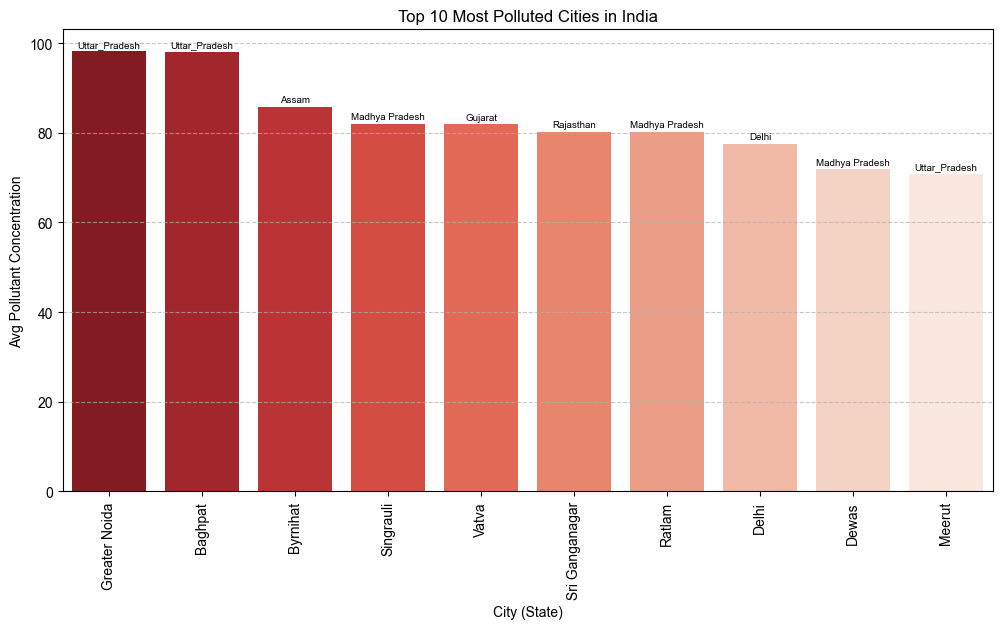

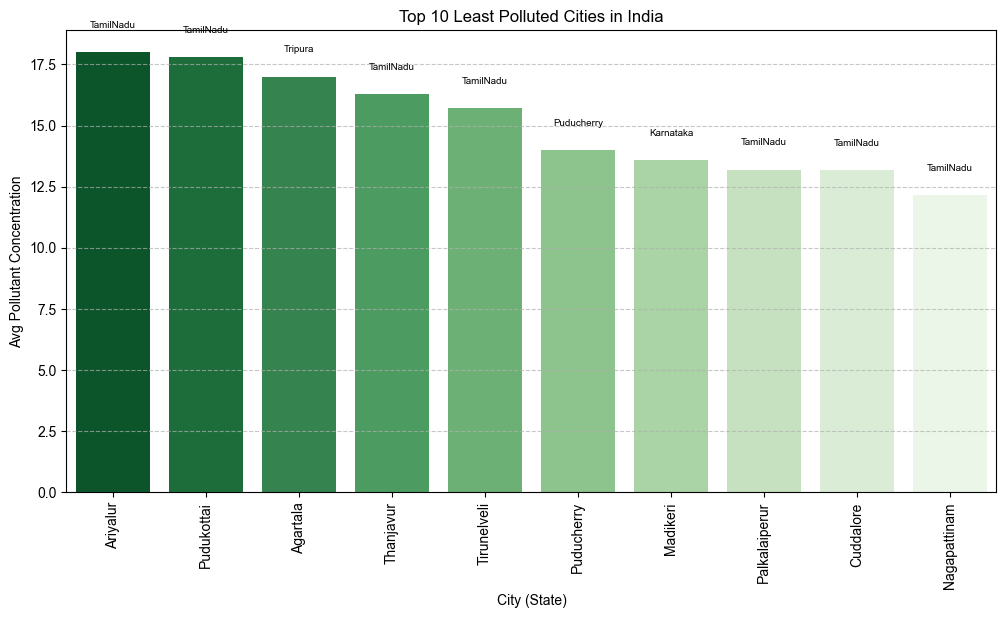

In [142]:
# Group by City and State, then calculate the average pollution level
city_state_pollution = df.groupby(["City", "State"])["Pollutant_Avg"].mean().reset_index()

# Sort by pollution levels
city_state_pollution = city_state_pollution.sort_values(by="Pollutant_Avg", ascending=False)

# Get the most and least polluted cities
most_polluted_city = city_state_pollution.iloc[0]
least_polluted_city = city_state_pollution.iloc[-1]

print(f"🌆 Most Polluted City: {most_polluted_city['City']} ({most_polluted_city['State']}) - {most_polluted_city['Pollutant_Avg']:.2f}")
print(f"🌿 Least Polluted City: {least_polluted_city['City']} ({least_polluted_city['State']}) - {least_polluted_city['Pollutant_Avg']:.2f}")

## --- Visualization --- ##

# Top 10 Most Polluted Cities
plt.figure(figsize=(12, 6))
sns.barplot(
    x=city_state_pollution["City"][:10], 
    y=city_state_pollution["Pollutant_Avg"][:10], 
    hue=city_state_pollution["City"][:10],  # Assign hue to match x
    palette="Reds_r",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel("City (State)")
plt.ylabel("Avg Pollutant Concentration")
plt.title("Top 10 Most Polluted Cities in India")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add state information as labels
for i, (city, state, value) in enumerate(zip(city_state_pollution["City"][:10], city_state_pollution["State"][:10], city_state_pollution["Pollutant_Avg"][:10])):
    plt.text(i, value + 1, f"{state}", ha="center", fontsize=7, color="black")

plt.show()

# Top 10 Least Polluted Cities
plt.figure(figsize=(12, 6))
sns.barplot(
    x=city_state_pollution["City"][-10:], 
    y=city_state_pollution["Pollutant_Avg"][-10:], 
    hue=city_state_pollution["City"][-10:],  # Assign hue to match x
    palette="Greens_r",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel("City (State)")
plt.ylabel("Avg Pollutant Concentration")
plt.title("Top 10 Least Polluted Cities in India")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add state information as labels
for i, (city, state, value) in enumerate(zip(city_state_pollution["City"][-10:], city_state_pollution["State"][-10:], city_state_pollution["Pollutant_Avg"][-10:])):
    plt.text(i, value + 1, f"{state}", ha="center", fontsize=7, color="black")

plt.show()

In [143]:
# Group by City and State, then calculate the average pollution level
city_state_pollution = df.groupby(["City", "State", "Latitude", "Longitude"])["Pollutant_Avg"].mean().reset_index()

# Sort by pollution levels
city_state_pollution = city_state_pollution.sort_values(by="Pollutant_Avg", ascending=False)

# Top 10 Most Polluted Cities
top_10_most_polluted = city_state_pollution[:10]

# Top 10 Least Polluted Cities
top_10_least_polluted = city_state_pollution[-10:]

# Create an India map centered around the mean latitude and longitude
india_map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=5)

# Add most polluted cities (Red markers)
for _, row in top_10_most_polluted.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=7,
        popup=f"{row['City']} ({row['State']}): {row['Pollutant_Avg']:.2f}",
        color="red",
        fill=True,
        fill_color="red",
    ).add_to(india_map)

# Add least polluted cities (Green markers)
for _, row in top_10_least_polluted.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=7,
        popup=f"{row['City']} ({row['State']}): {row['Pollutant_Avg']:.2f}",
        color="green",
        fill=True,
        fill_color="green",
    ).add_to(india_map)

# Display the map in Jupyter Notebook
display(india_map)

## 2. Most Common Pollutant

🔥 Most Common Pollutant: PM2.5 (Recorded 479 times)


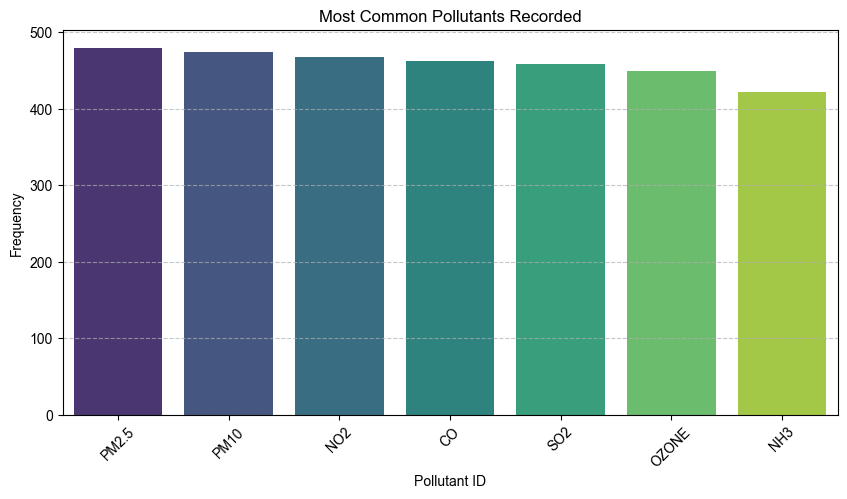

In [144]:
# Count occurrences of each pollutant
pollutant_counts = df["Pollutant_Id"].value_counts()

# Get the most common pollutant
most_common_pollutant = pollutant_counts.idxmax()
most_common_count = pollutant_counts.max()

print(f"🔥 Most Common Pollutant: {most_common_pollutant} (Recorded {most_common_count} times)")

# --- Visualization --- #

# Bar Plot of Pollutant Frequency
plt.figure(figsize=(10, 5))
sns.barplot(
    x=pollutant_counts.index, 
    y=pollutant_counts.values, 
    hue=pollutant_counts.index,  # Fix: Assigning hue
    legend=False,  # Fix: Removing legend
    palette="viridis"
)
plt.xlabel("Pollutant ID")
plt.ylabel("Frequency")
plt.title("Most Common Pollutants Recorded")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 3. Maximum And Minimum Pollution Levels Per Pollutant

📊 Maximum and Minimum Pollution Levels per Pollutant:
  Pollutant_Id  Max_Pollution  Min_Pollution
0           CO          191.0            1.0
1          NH3           64.0            1.0
2          NO2          334.0            1.0
3        OZONE          304.0            1.0
4         PM10          500.0            1.0
5        PM2.5          500.0            1.0
6          SO2          139.0            1.0


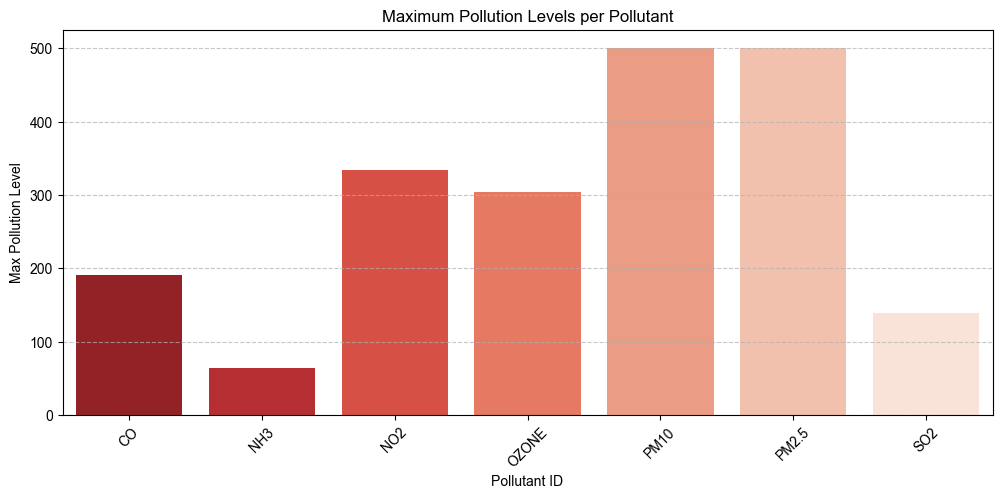

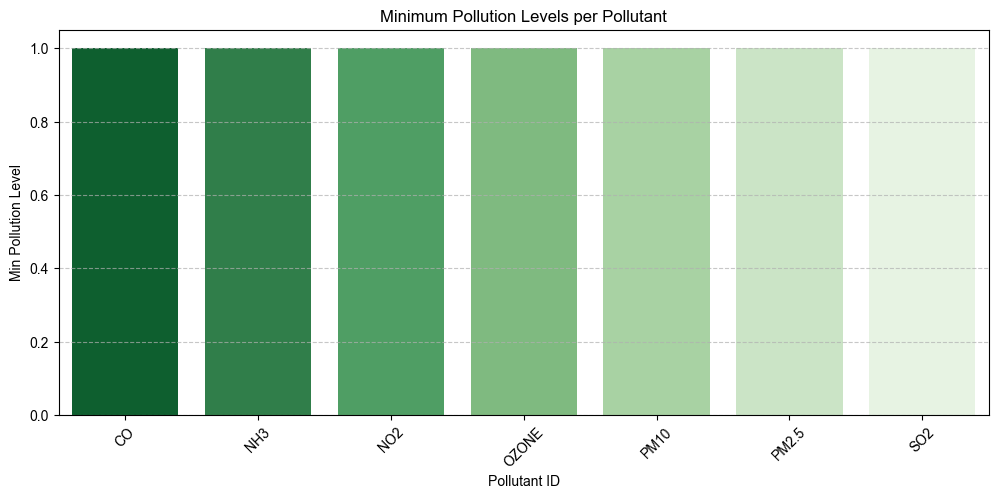

In [145]:
# Group by Pollutant and find the max & min values
pollutant_stats = df.groupby("Pollutant_Id").agg(
    Max_Pollution=("Pollutant_Max", "max"),
    Min_Pollution=("Pollutant_Min", "min")
).reset_index()

# Display results
print("📊 Maximum and Minimum Pollution Levels per Pollutant:")
print(pollutant_stats)

# --- Visualization --- #
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(12, 5))
sns.barplot(
    x=pollutant_stats["Pollutant_Id"], 
    y=pollutant_stats["Max_Pollution"], 
    hue=pollutant_stats["Pollutant_Id"],  # Fixing hue issue
    legend=False,
    palette="Reds_r"
)
plt.xlabel("Pollutant ID")
plt.ylabel("Max Pollution Level")
plt.title("Maximum Pollution Levels per Pollutant")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=pollutant_stats["Pollutant_Id"], 
    y=pollutant_stats["Min_Pollution"], 
    hue=pollutant_stats["Pollutant_Id"],  # Fixing hue issue
    legend=False,
    palette="Greens_r"
)
plt.xlabel("Pollutant ID")
plt.ylabel("Min Pollution Level")
plt.title("Minimum Pollution Levels per Pollutant")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 4. Pollution Variability Per Location

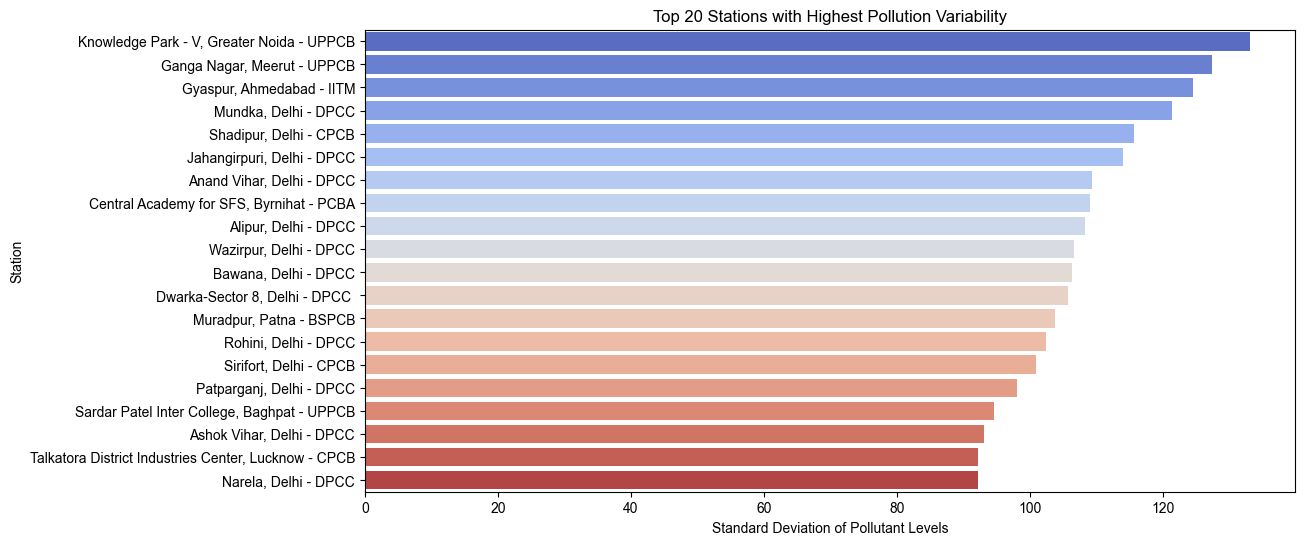

In [146]:
# Calculate the standard deviation of pollutant levels per station
pollution_variability = df.groupby("Station")["Pollutant_Avg"].std().reset_index()
pollution_variability.columns = ["Station", "Pollution_STD"]

# Sort stations by pollution variability
pollution_variability = pollution_variability.sort_values(by="Pollution_STD", ascending=False)

# Plot Pollution Variability across Stations
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Pollution_STD",
    y="Station",
    data=pollution_variability.head(20),
    hue="Station",  # Explicitly setting hue
    legend=False,  # Avoid unnecessary legend
    palette="coolwarm"
)
plt.xlabel("Standard Deviation of Pollutant Levels")
plt.ylabel("Station")
plt.title("Top 20 Stations with Highest Pollution Variability")
plt.show()

## 5. City-wise Pollutant Contributions¶

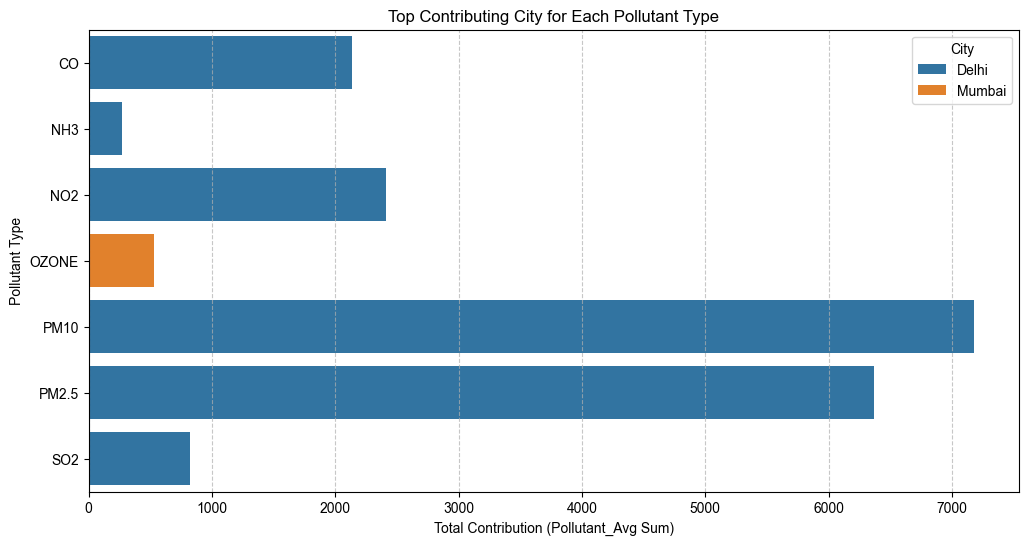

In [147]:
# Group by City and Pollutant_Id, summing the average pollutant levels
city_pollutant_contributions = df.groupby(["City", "Pollutant_Id"])["Pollutant_Avg"].sum().reset_index()

# Find the city with the highest contribution for each pollutant type
top_city_per_pollutant = city_pollutant_contributions.loc[city_pollutant_contributions.groupby("Pollutant_Id")["Pollutant_Avg"].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Pollutant_Avg", y="Pollutant_Id", hue="City", data=top_city_per_pollutant, dodge=False)

plt.xlabel("Total Contribution (Pollutant_Avg Sum)")
plt.ylabel("Pollutant Type")
plt.title("Top Contributing City for Each Pollutant Type")
plt.legend(title="City", bbox_to_anchor=(1, 1))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 6. Location With Highest Pollutant Spikes

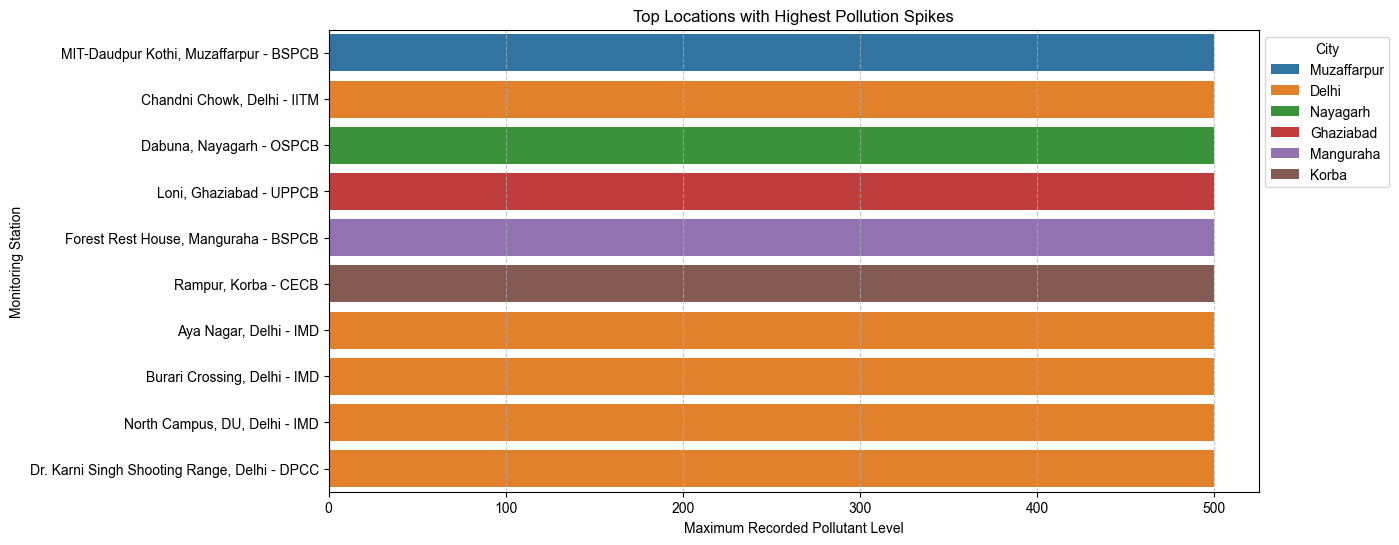

In [148]:
# Find the top 10 locations with the highest recorded Pollutant_Max values
top_pollution_spikes = df.nlargest(10, "Pollutant_Max")[["City", "State", "Station", "Pollutant_Max"]]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Pollutant_Max", y="Station", hue="City", data=top_pollution_spikes, dodge=False)

plt.xlabel("Maximum Recorded Pollutant Level")
plt.ylabel("Monitoring Station")
plt.title("Top Locations with Highest Pollution Spikes")
plt.legend(title="City", bbox_to_anchor=(1, 1))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 7. Stations With Frequent High Readings

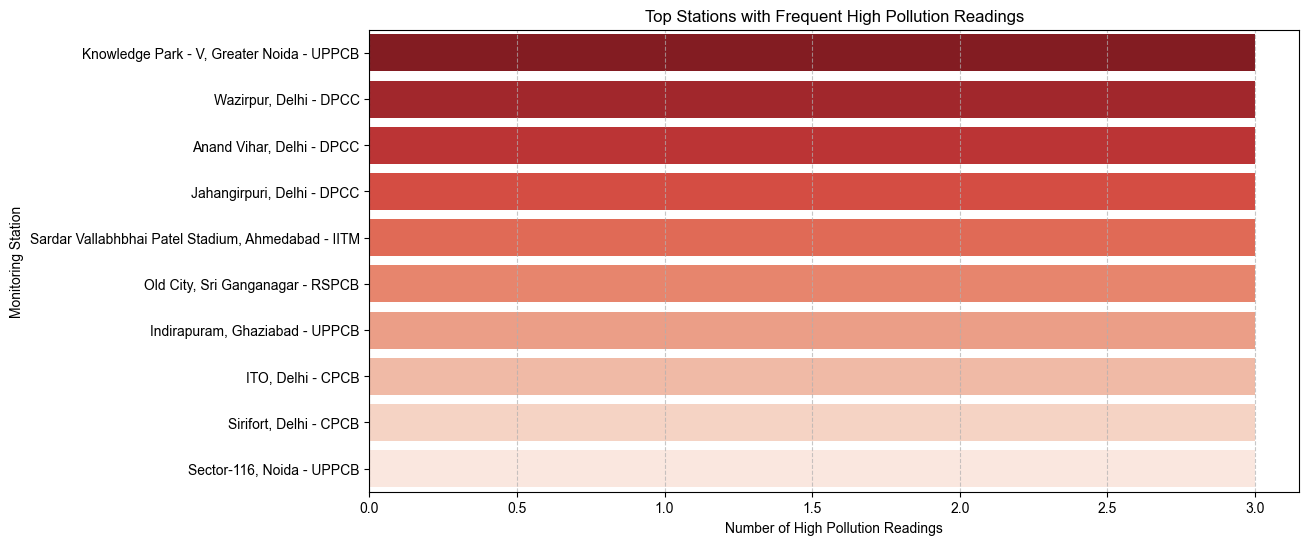

In [149]:
# Calculate the 90th percentile threshold for Pollutant_Avg
threshold = df["Pollutant_Avg"].quantile(0.90)

# Count how often each station exceeds this threshold
high_pollution_stations = df[df["Pollutant_Avg"] > threshold]["Station"].value_counts().head(10)

# Convert to DataFrame for plotting
high_pollution_stations_df = high_pollution_stations.reset_index()
high_pollution_stations_df.columns = ["Station", "High Readings Count"]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="High Readings Count", hue = 'Station', y="Station", data=high_pollution_stations_df, palette="Reds_r")

plt.xlabel("Number of High Pollution Readings")
plt.ylabel("Monitoring Station")
plt.title("Top Stations with Frequent High Pollution Readings")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 8. Correlation Between Pollutants

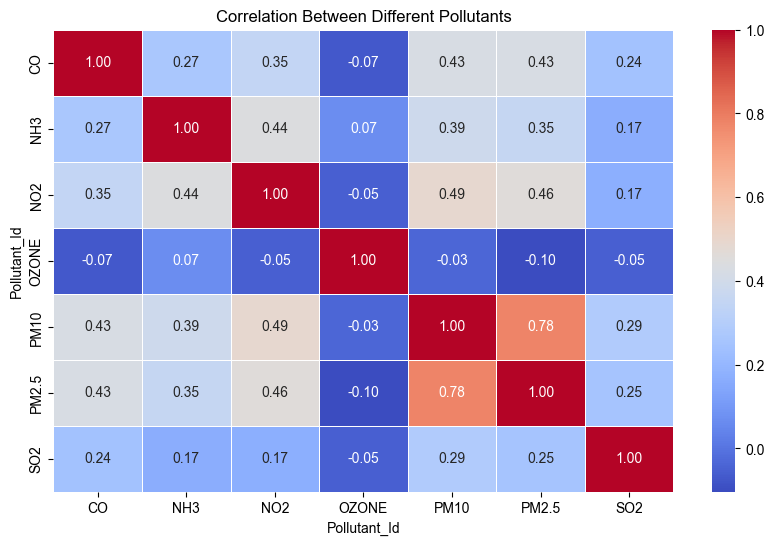

In [150]:
# Pivoting the data to have pollutants as separate columns
pollutant_df = df.pivot_table(index=["Station"], columns="Pollutant_Id", values="Pollutant_Avg", aggfunc="mean")

# Compute correlation between different pollutants
pollutant_corr = pollutant_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pollutant_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Different Pollutants")
plt.show()

## 9. Pollution Hotspots

In [151]:
# Ensure required columns exist
df.columns = df.columns.astype(str)

# Remove rows with missing latitude/longitude or pollution data
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Avg"])

# Convert Latitude and Longitude to numeric
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")
df["Pollutant_Avg"] = pd.to_numeric(df["Pollutant_Avg"], errors="coerce")

# Remove invalid rows after conversion
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Avg"])

# Create a Folium Map centered on India's mean latitude & longitude
india_map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=5)

# Create data points for the heatmap (latitude, longitude, pollution level)
heat_data = df[["Latitude", "Longitude", "Pollutant_Avg"]].values.tolist()

# Add HeatMap layer
HeatMap(heat_data, radius=15).add_to(india_map)

# Show the map
india_map

## 10. Areas With Cleanest Air

In [152]:
# Ensure required columns exist
df.columns = df.columns.astype(str)

# Remove rows with missing latitude/longitude or pollution data
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Avg"])

# Convert Latitude, Longitude, and Pollution data to numeric
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")
df["Pollutant_Avg"] = pd.to_numeric(df["Pollutant_Avg"], errors="coerce")

# Remove invalid rows after conversion
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Avg"])

# Sort by lowest pollution levels
cleanest_areas = df.sort_values(by="Pollutant_Avg", ascending=True).head(10)

# Create a Folium Map centered on India's mean latitude & longitude
india_map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=5)

# Add cleanest areas (Blue markers)
for _, row in cleanest_areas.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=7,
        popup=f"{row['City']} ({row['State']}): {row['Pollutant_Avg']:.2f}",
        color="blue",
        fill=True,
        fill_color="blue",
    ).add_to(india_map)

# Show the map
india_map

## 11. Extreme pollution Events

In [153]:
# Ensure required columns exist
df.columns = df.columns.astype(str)

# Define the extreme pollution threshold (Adjust as needed)
CRITICAL_THRESHOLD = 100  # Example threshold (modify based on your data)

# Remove rows with missing latitude/longitude or pollution data
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Max"])

# Convert Latitude, Longitude, and Pollutant_Max to numeric
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")
df["Pollutant_Max"] = pd.to_numeric(df["Pollutant_Max"], errors="coerce")

# Remove invalid rows after conversion
df = df.dropna(subset=["Latitude", "Longitude", "Pollutant_Max"])

# Filter locations with extreme pollution events
extreme_pollution_events = df[df["Pollutant_Max"] > CRITICAL_THRESHOLD]

# Create a Folium Map centered on India's mean latitude & longitude
india_map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=5)

# Add extreme pollution locations (Red markers)
for _, row in extreme_pollution_events.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=10,
        popup=f"{row['City']} ({row['State']}): {row['Pollutant_Max']:.2f}",
        color="red",
        fill=True,
        fill_color="red",
    ).add_to(india_map)

# Show the map
india_map

## **Final Report**

### Report on Pollution Levels in India Based on Air Quality Data (April 3, 2025)

#### Overview
This report analyzes air quality data collected from various monitoring stations across India on April 3, 2025, at 09:00. The dataset includes measurements of key pollutants such as PM2.5, PM10, NO2 (nitrogen dioxide), SO2 (sulfur dioxide), CO (carbon monoxide), NH3 (ammonia), and OZONE (ozone) from multiple cities and states. The analysis focuses on pollutant concentrations, their potential health impacts, and the overall air quality situation based on standard guidelines.

#### Key Pollutants and Their Concentrations
1. **PM2.5 (Fine Particulate Matter)**
   - **Range**: 1 µg/m³ (Maninagar, Ahmedabad) to 500 µg/m³ (Shadipur, Delhi).
   - **Average Values**: Common averages include 48 µg/m³ and 304–349 µg/m³ in highly polluted areas.
   - **Notable Hotspots**: Greater Noida (349 µg/m³), Gyaspur, Ahmedabad (305 µg/m³), Shadipur, Delhi (304 µg/m³), Meerut (289 µg/m³), and Byrnihat, Assam (292 µg/m³).
   - **Health Implications**: PM2.5 particles can penetrate deep into the lungs and bloodstream, causing respiratory and cardiovascular diseases. The World Health Organization (WHO) recommends a 24-hour mean of 15 µg/m³, with levels above 35 µg/m³ considered unhealthy.

2. **PM10 (Coarse Particulate Matter)**
   - **Range**: 1 µg/m³ (Nandesari, Gujarat) to 500 µg/m³ (multiple locations, e.g., Delhi, Mumbai, Patna).
   - **Average Values**: Frequently 104 µg/m³, with higher averages like 297 µg/m³ in Mundka, Delhi.
   - **Notable Hotspots**: Mundka, Delhi (297 µg/m³), Gyaspur, Ahmedabad (286 µg/m³), Meerut (285 µg/m³), and Jahangirpuri, Delhi (274 µg/m³).
   - **Health Implications**: PM10 affects the respiratory system and can exacerbate conditions like asthma. The WHO guideline is 45 µg/m³ (24-hour mean), with levels above 100 µg/m³ posing significant risks.

3. **NO2 (Nitrogen Dioxide)**
   - **Range**: 1 µg/m³ (e.g., Hosur, Tamil Nadu) to 12 µg/m³ (multiple locations).
   - **Average Values**: Predominantly 10 µg/m³ across many stations.
   - **Notable Areas**: Delhi, Mumbai, and Patna consistently report 10–12 µg/m³.
   - **Health Implications**: NO2 irritates the respiratory system and can worsen asthma. The WHO guideline is 25 µg/m³ (24-hour mean), and most recorded levels are below this threshold, indicating moderate risk.

4. **SO2 (Sulfur Dioxide)**
   - **Range**: 1 µg/m³ to 12 µg/m³.
   - **Average Values**: Commonly 9 µg/m³.
   - **Notable Areas**: Widespread low levels, with 9 µg/m³ in cities like Mumbai, Delhi, and Patna.
   - **Health Implications**: SO2 affects the respiratory system, particularly in asthmatics. The WHO guideline is 40 µg/m³ (24-hour mean), and current levels are well below this, suggesting minimal immediate danger.

5. **CO (Carbon Monoxide)**
   - **Range**: 2 µg/m³ (Dhanbad, Jharkhand) to 34 µg/m³ (e.g., Nalbari, Assam; Gurugram, Haryana).
   - **Average Values**: Mostly 34 µg/m³ in urban areas.
   - **Notable Areas**: Nalbari, Gurugram, and Pune report higher averages.
   - **Health Implications**: CO reduces oxygen delivery in the body, posing risks at high concentrations. The WHO guideline is 4 mg/m³ (4,000 µg/m³) for 24 hours, and current levels (in µg/m³) are far below this, indicating low risk.

6. **NH3 (Ammonia)**
   - **Range**: 1 µg/m³ to 15 µg/m³ (ICRISAT Patancheru, Hyderabad).
   - **Average Values**: Typically 1–3 µg/m³.
   - **Notable Areas**: Most stations report low levels, with occasional spikes (e.g., Meerut at 2 µg/m³ avg, max 11 µg/m³).
   - **Health Implications**: NH3 irritates the eyes and respiratory tract at high levels. No strict WHO guideline exists, but levels below 200 µg/m³ are generally safe, and current data suggests negligible risk.

7. **OZONE (Ozone)**
   - **Range**: 1 µg/m³ to 254 µg/m³ (Major Dhyan Chand National Stadium, Delhi).
   - **Average Values**: Commonly 15 µg/m³, with outliers at 1–3 µg/m³ in some areas.
   - **Notable Hotspots**: Delhi (254 µg/m³), Ahmedabad (189 µg/m³), Jahangirpuri, Delhi (128 µg/m³).
   - **Health Implications**: Ground-level ozone irritates the lungs and worsens respiratory conditions. The WHO guideline is 100 µg/m³ (8-hour mean), and exceedances in Delhi and Ahmedabad indicate potential health concerns.

#### Air Quality Assessment
- **Safe Areas**: Locations with low pollutant levels (e.g., NH3, SO2, NO2 at 1–3 µg/m³) include rural or less industrialized areas like Gangtok, Sikkim, and parts of Tamil Nadu (e.g., Ariyalur, Dindigul).
- **Moderate Risk**: Cities with PM2.5 around 48 µg/m³ and PM10 at 104 µg/m³ (e.g., Nalbari, Patna, Mumbai) exceed WHO guidelines but are below critical thresholds for immediate severe impact.
- **High Risk**: Urban centers like Delhi, Greater Noida, Ahmedabad, and Meerut show dangerously high PM2.5 (up to 500 µg/m³) and PM10 (up to 500 µg/m³), far exceeding safe limits. Ozone spikes in Delhi (254 µg/m³) further elevate risks.

#### Health and Environmental Impact
- **Respiratory and Cardiovascular Risks**: High PM2.5 and PM10 levels in Delhi, Greater Noida, and Ahmedabad pose significant threats, particularly to children, the elderly, and those with pre-existing conditions. Long-term exposure increases mortality rates from lung cancer and heart disease.
- **Ozone Concerns**: Elevated ozone in Delhi and Ahmedabad can cause acute respiratory distress, especially during outdoor activities.
- **Cumulative Effects**: Even where individual pollutants are below critical thresholds (e.g., NO2, SO2), the combined effect with high PM levels worsens air quality and health outcomes.

#### Recommendations
1. **Immediate Action in Hotspots**: Implement emergency measures in Delhi, Greater Noida, and Ahmedabad, such as traffic restrictions, industrial emission controls, and public health advisories.
2. **Monitoring and Awareness**: Enhance real-time air quality monitoring and public communication in high-risk areas.
3. **Long-Term Mitigation**: Reduce particulate emissions through cleaner energy, stricter industrial standards, and urban green spaces.
4. **Vulnerable Populations**: Advise sensitive groups to limit outdoor exposure in cities with PM2.5 > 100 µg/m³ or ozone > 100 µg/m³.

#### Conclusion
As of April 3, 2025, air pollution levels across India vary widely, with urban centers like Delhi, Greater Noida, and Ahmedabad exhibiting dangerously high PM2.5, PM10, and ozone concentrations, posing severe health risks. Other pollutants (NO2, SO2, CO, NH3) remain within safer limits in most areas. Immediate action is critical in high-risk zones, while sustained efforts are needed nationwide to improve air quality and protect public health.